基本的な統計情報:
              変化率
count  578.000000
mean    -4.078656
std     33.887200
min    -74.695864
25%    -21.820774
50%     -7.526886
75%      5.694678
max    339.436620
平均値: -4.078656302698666
中央値: -7.52688553376011


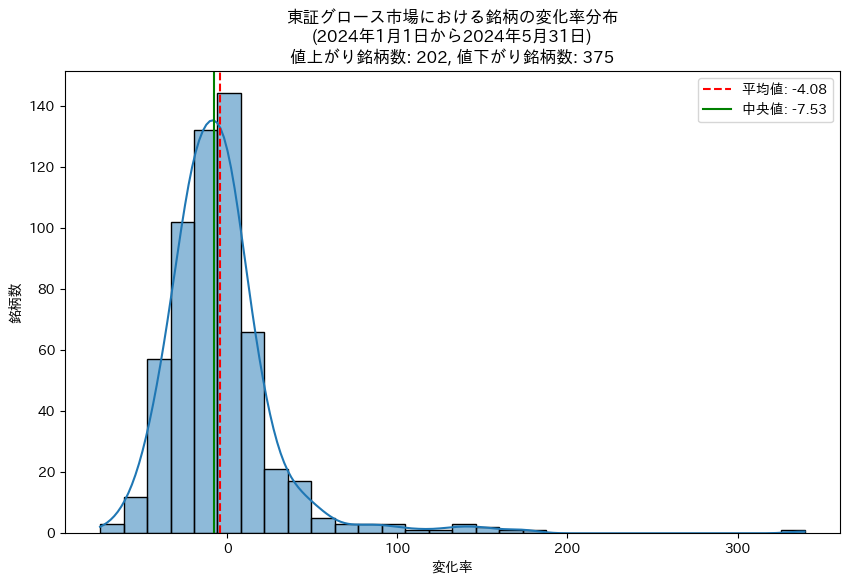

上位10銘柄:
               変化率
3905.T  339.436620
6026.T  175.566751
9235.T  169.764838
5246.T  152.785924
4894.T  151.609936
6696.T  142.975207
1436.T  136.550366
4425.T  134.168157
5595.T  124.550898
6574.T  112.167832
下位10銘柄:
              変化率
137A.T -54.597876
4169.T -55.165877
4442.T -55.236527
130A.T -55.697721
4882.T -56.294201
5616.T -58.098224
155A.T -59.500379
4263.T -61.446682
4485.T -68.007968
6573.T -74.695864


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 日本語フォントの設定
jp_font_path = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'  # 実際の日本語フォントファイルのパスに置き換えてください
jp_font_prop = fm.FontProperties(fname=jp_font_path)
plt.rcParams['font.family'] = jp_font_prop.get_name()

# CSVファイルのパス
ohlc_file_path = 'data/growth_adj_close_20240101_20240531.csv'

# データをCSVファイルから読み込む
df = pd.read_csv(ohlc_file_path, index_col=0)

# 各銘柄の最古の値と5月31日までのパーセンテージ変化を計算
percentage_change = {}
for ticker in df.columns:
    valid_data = df[ticker].dropna()
    if not valid_data.empty and not pd.isna(df[ticker].iloc[-1]):
        start_price = valid_data.iloc[0]
        end_price = valid_data.iloc[-1]
        change = ((end_price - start_price) / start_price) * 100
        percentage_change[ticker] = change
    else:
        print(f"Warning: {ticker} has no valid data or is delisted and will be skipped.")

# 変化率のランキングを作成
ranking = pd.DataFrame.from_dict(percentage_change, orient='index', columns=['変化率'])
ranking = ranking.sort_values(by='変化率', ascending=False)

# 基本的な統計情報を表示
print("基本的な統計情報:")
print(ranking.describe())

# 中央値と平均値の計算
mean_change = ranking['変化率'].mean()
median_change = ranking['変化率'].median()
print(f"平均値: {mean_change}")
print(f"中央値: {median_change}")

# 値上がり銘柄数と値下がり銘柄数を計算
num_gain = (ranking['変化率'] > 0).sum()
num_loss = (ranking['変化率'] < 0).sum()

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
sns.histplot(ranking['変化率'], bins=30, kde=True)
plt.axvline(mean_change, color='r', linestyle='--', label=f'平均値: {mean_change:.2f}')
plt.axvline(median_change, color='g', linestyle='-', label=f'中央値: {median_change:.2f}')
plt.title(f'東証グロース市場における銘柄の変化率分布\n'
          f'(2024年1月1日から2024年5月31日)\n'
          f'値上がり銘柄数: {num_gain}, 値下がり銘柄数: {num_loss}')
plt.xlabel('変化率')
plt.ylabel('銘柄数')
plt.legend()
plt.show()

# 上位10銘柄の表示
top_10 = ranking.head(10)
print("上位10銘柄:")
print(top_10)

# 下位10銘柄の表示
bottom_10 = ranking.tail(10)
print("下位10銘柄:")
print(bottom_10)